In [2]:
import pandas as pd

averages_df = pd.DataFrame(columns=['Partition Size', 'average'])

averages_df

,Partition Size,average


In [8]:
from mastermind import MastermindGame

game_settings = {
   "agentFile": "my_agent.py",
   "codeLength": 5,
   "numberOfColours": 6,
   "maxNumberOfGuesses": 10,
   "totalNumberOfGames": 100,
   "verbose": True,
   "seed": 0
}

partition_divisors = [2, 3, 4, 5, 8, 10]
averages_df['Partition Size'] = partition_divisors

game = MastermindGame(4, 3, False)

for divisor in partition_divisors:

    print("Running with divisor:", divisor)

    average = game.run(agentFile=game_settings['agentFile'],
                      num_guesses=game_settings['maxNumberOfGuesses'],
                      num_games=game_settings['totalNumberOfGames'],
                      seed=game_settings['seed'],
                      partition_divisor=divisor)

    averages_df.loc[averages_df['Partition Size'] == divisor, 'average'] = average

Running with divisor:  2
Average score after game 1: 5.00
Average running time per game 1 s.
Time remaining 4 min, 51 s.
Expected total running time 4 min, 52 s.
Average score after game 2: 4.50
Average running time per game 0.9 s.
Time remaining 3 min, 55 s.
Expected total running time 3 min, 56 s.
Average score after game 3: 4.33
Average running time per game 1.0 s.
Time remaining 4 min, 4 s.
Expected total running time 4 min, 7 s.
Average score after game 4: 4.50
Average running time per game 0.9 s.
Time remaining 3 min, 45 s.
Expected total running time 3 min, 49 s.
Average score after game 5: 4.40
Average running time per game 0.9 s.
Time remaining 3 min, 34 s.
Expected total running time 3 min, 39 s.
Average score after game 6: 4.33
Average running time per game 0.9 s.
Time remaining 3 min, 42 s.
Expected total running time 3 min, 47 s.
Average score after game 7: 4.29
Average running time per game 0.9 s.
Time remaining 3 min, 35 s.
Expected total running time 3 min, 42 s.
Averag

KeyboardInterrupt: 

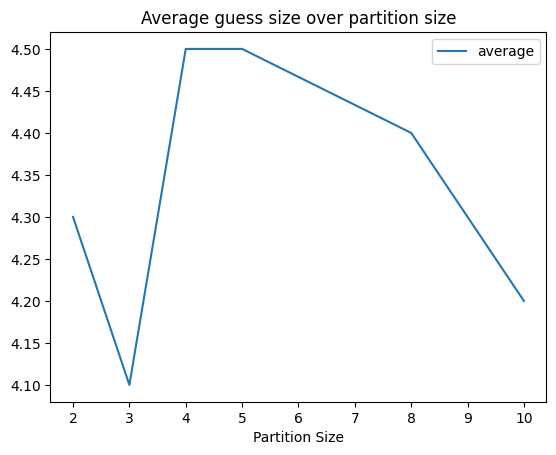

In [7]:
import matplotlib.pyplot as plt

averages_df.plot.line(x='Partition Size', y='average')

plt.title("Average guess size over partition size")

plt.savefig("averages.png", dpi=300)

In [11]:
averages_df

,Partition Size,average
0,2,4.2
1,3,4.7
2,5,4.1
3,4,4.2
4,5,4.1
